# Some probability illustrations with playing cards and R

The `play4YES` package has been made to simplify working with cards.  

The `build_deck` function produces a vector of length 52.  Unicode symbols for card suits
are used to make the vector elements resemble playing cards.

## Basic operations

In [36]:
library(play4YES)
options(digits=3)

0/0 packages newly attached/loaded, see sessionInfo() for details.



In [37]:
d = build_deck()
length(d)

[1] 52

In [38]:
d

[1] "2 ♡"  "3 ♡"  "4 ♡"  "5 ♡"  "6 ♡"  "7 ♡"  "8 ♡"  "9 ♡"  "10 ♡" "J ♡" 
[11] "Q ♡"  "K ♡"  "A ♡"  "2 ♢"  "3 ♢"  "4 ♢"  "5 ♢"  "6 ♢"  "7 ♢"  "8 ♢" 
[21] "9 ♢"  "10 ♢" "J ♢"  "Q ♢"  "K ♢"  "A ♢"  "2 ♣"  "3 ♣"  "4 ♣"  "5 ♣" 
[31] "6 ♣"  "7 ♣"  "8 ♣"  "9 ♣"  "10 ♣" "J ♣"  "Q ♣"  "K ♣"  "A ♣"  "2 ♤" 
[41] "3 ♤"  "4 ♤"  "5 ♤"  "6 ♤"  "7 ♤"  "8 ♤"  "9 ♤"  "10 ♤" "J ♤"  "Q ♤" 
[51] "K ♤"  "A ♤"

We show that each suit has 13 cards with identical faces.  Each suit-face combination appears once.

In [39]:
table(suits(d), faces(d))

   
    10 2 3 4 5 6 7 8 9 A J K Q
  ♡  1 1 1 1 1 1 1 1 1 1 1 1 1
  ♢  1 1 1 1 1 1 1 1 1 1 1 1 1
  ♣  1 1 1 1 1 1 1 1 1 1 1 1 1
  ♤  1 1 1 1 1 1 1 1 1 1 1 1 1

We define a few functions to make our terminology more natural.

In [60]:
shuffle = sample
top_card = function(x) x[1]
deal_5 = function(x) x[1:5]

We aren't controlling the random shuffling yet, so what you see may differ from what is shown in the next two cells.

In [41]:
t1 = top_card(shuffle(d))
t1

[1] "10 ♣"

In [42]:
top_card(shuffle(d))

[1] "J ♤"

## Make shuffles reproducible with `set.seed`

In [43]:
set.seed(1234)
top_card(shuffle(d))

[1] "3 ♣"

In [44]:
set.seed(1234)
top_card(shuffle(d))

[1] "3 ♣"

## "The distribution of top-card faces after 100 shuffles of a fair deck"

In [45]:
t1 = table(replicate(100, faces(top_card(shuffle(d)))))
t1


10  2  3  4  5  6  7  8  9  A  J  K  Q 
11  5  7 15  6  6  7  7 11  5 10  4  6 

In [46]:
100/13

[1] 7.69

In [47]:
t1 - 7.69


   10     2     3     4     5     6     7     8     9     A     J     K     Q 
 3.31 -2.69 -0.69  7.31 -1.69 -1.69 -0.69 -0.69  3.31 -2.69  2.31 -3.69 -1.69 

In [48]:
mean(t1 - 7.69)

[1] 0.00231

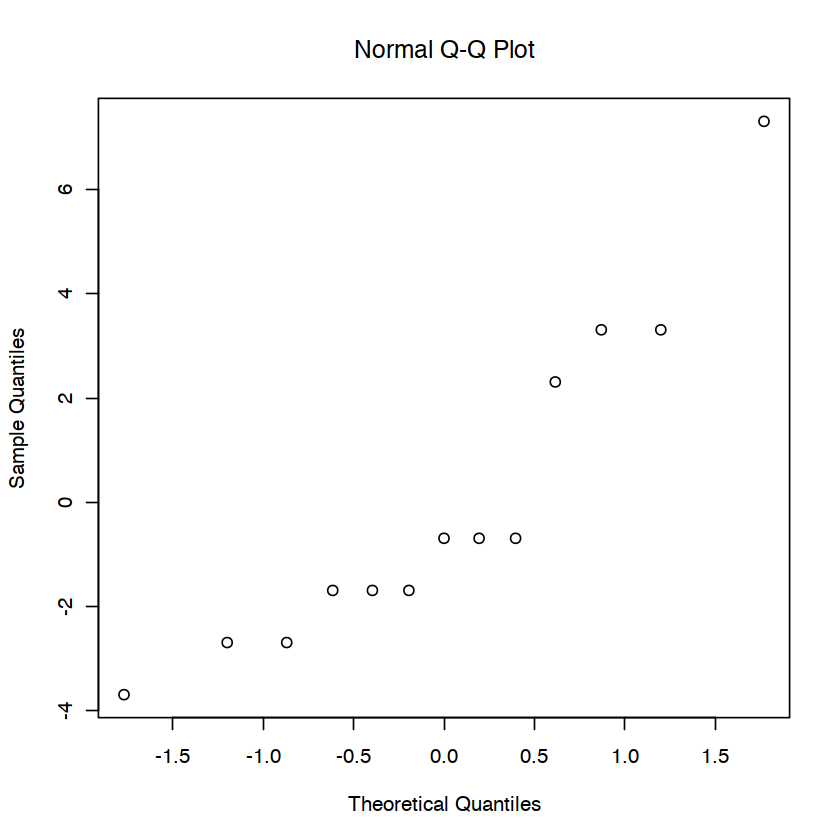

In [49]:
qqnorm(as.numeric(t1)-7.69)

## Make a biased deck

We'll duplicate one card, removing one.

In [52]:
bdeck = d
bdeck[3] = bdeck[18]
table(suits(bdeck), faces(bdeck))

   
    10 2 3 4 5 6 7 8 9 A J K Q
  ♡  1 1 1 0 1 1 1 1 1 1 1 1 1
  ♢  1 1 1 1 1 2 1 1 1 1 1 1 1
  ♣  1 1 1 1 1 1 1 1 1 1 1 1 1
  ♤  1 1 1 1 1 1 1 1 1 1 1 1 1

In [53]:
t2 = table(replicate(100, faces(top_card(shuffle(bdeck)))))
t2


10  2  3  4  5  6  7  8  9  A  J  K  Q 
 7 13  6  6  6  7  8  9  4 11  6  5 12 

In [54]:
t3 = table(replicate(10000, faces(top_card(shuffle(bdeck)))))
t3


 10   2   3   4   5   6   7   8   9   A   J   K   Q 
771 779 816 594 754 926 794 767 750 759 733 753 804 

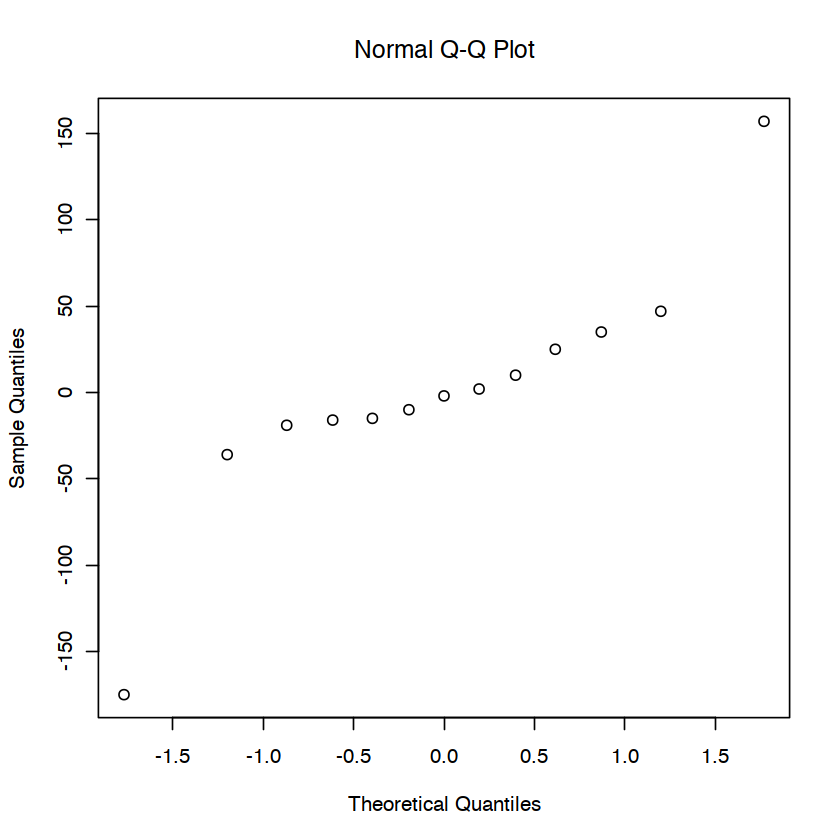

In [55]:
qqnorm(as.numeric(t3)-769)

# Poker probabilities

In [62]:
mean(replicate(100000, one_pair(deal_5(shuffle(d)))))

[1] 0.423

In [68]:
mean(replicate(100000, one_pair(deal_5(shuffle(bdeck)))))

[1] 0.424

In [64]:
mean(replicate(1000000, is_flush(deal_5(shuffle(d)))))

[1] 0.00198

In [67]:
mean(replicate(1000000, is_flush(deal_5(shuffle(bdeck)))))

[1] 0.00203

In [72]:
mean(replicate(100000, two_pairs(deal_5(shuffle(d)))))

[1] 0.0479

In [71]:
mean(replicate(100000, two_pairs(deal_5(shuffle(bdeck)))))

[1] 0.0492